***
# A Brief Note on Univariate Statistics 

Author: Olatomiwa Bifarin. <br>

_A draft copy_

In [1]:
## Import libraries
import numpy as np
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import seaborn as sns
#For Seaborn plots
import seaborn as sns; sns.set(style='white')
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'
import scipy

**Notebook Outline**

1. [Descriptive Statistics](#1) <br>
    1.1 [Central Tendency](#1.1) <br>
    1.2 [Measures of Dispersion](#1.2) <br>
    1.3 [Measures of Association](#1.3)
2. [Hypothesis Testing](#2)
3. [Explaning _p_-value](#3)
4. [One Sample _t_-test](#4)
5. [Two Sample _t_-test](#5)
6. [ANOVA _F_-test](#6)
7. [Multiple Test Comparison](#7)
8. [Some Motivating Examples](#8) <br>
    8.1 [Exploratory Data Analysis](#8.1) <br>
    8.2 [Mean Inference Problem](#8.2) <br>

## 1. Descriptive Statistics
<a id="1"></a>
Descriptive statistics, as the name suggests describe a given dataset. This should be contrasted with inferential statistics which takes a leap, to make some sort of conclusion or judgement about a population from the sample dataset. <br> Let's take a look at some these descriptive statistics.

### 1.1 Central Tendency
<a id="1.1"></a>

**Sample Mean**
$$
\bar{x_k} = \frac{1}{n}\sum_{i=1}^{n} x_{ik}
$$

where $ \bar{x_k} $ represents the mean of an observed data for the k$^{th}$ variable.

`python implementation`

In [2]:
a = [1,3,4,5,6]
print ("Mean is ", np.mean(a))

Mean is  3.8


### 1.2 Measures of Dispersion
<a id="1.2"></a>

**Sample Variance**
$$
{s}_k^2 = \frac{1}{n-1}\sum_{i=1}^{n}{(x_{ik} - \bar{x_k})}^2
$$

where $ {s}_k^2 $ represents the variance of an observed data for the k$^{th}$ variable. 


**Sample Standard deviation**
$$
{s}_k = \sqrt{{s}_k^2}
$$

where $ {s}_k $ represents the standard deviation of an observed data for the k$^{th}$ variable. <br>

`python implementation`

In [3]:
print ("Variance is ", np.var(a))
print ("Standard deviation is ", round(np.std(a),2))

Variance is  2.96
Standard deviation is  1.72


### 1.3 Measures of Association
<a id="1.3"></a>

**Sample covariance**
$$
s_{ab} = \frac{1}{n-1}\textstyle \sum_{i=1}^{n}(x_{ia} - \bar{x_a})(x_{ib} - \bar{x_b})
$$

where $ s_{ab} $ represents the covariance between variable a and b.

$ s_{ab} = 0 $ suggests that a and b are uncorrelated <br>
$ s_{ab} > 0 $ suggests that a and b are positively correlated <br>
$ s_{ab} < 0 $ suggests that a and b are negatively correlated 

**Correlation** <br>
The standardized form of covariance
$$
r_{ab} = \frac{s_{ab}}{s_as_b}
$$

Where: 

$$
-1 < r_{ab} < 1
$$

$ r_{ab} = 0 $ suggests that a and b are uncorrelated <br>
$ r_{ab} $ close to 1 suggests that a and b are positively correlated <br>
$ r_{ab} $ close to -1 suggests that a and b are negatively correlated

`python implementation`

In [4]:
a

[1, 3, 4, 5, 6]

In [5]:
b = [4,5,6,2,1]

In [6]:
print ("covariance is ", np.cov(a,b))
print ("correlation is ", np.corrcoef(a,b))

covariance is  [[ 3.7  -2.35]
 [-2.35  4.3 ]]
correlation is  [[ 1.         -0.58915935]
 [-0.58915935  1.        ]]


## 2. Hypothesis Testing
<a id="2"></a>
This is the realm of inferential statistics. Where, as stated above, we aim to make some judgement about a population from the analysis of a given set of sample data.
-  `Null hypothesis`: denoted by $ H_0 $, this is the hypothesis to be disproved, which is what we will expect based on chance.
-  `Alternative hypothesis`: denoted by $ H_1 $. This is the opposite of $ H_0 $, influenced by something other than chance. 

Take this hypothesis testing for flipping a coin, as an example: 

$$ H_0: p = 0.5 $$  $$ and $$ $$ H_1: p \neq 0.5 $$  

**Decision Errors**

-  `Type 1 Error`: Null hypothesis is rejected when it is true. 
-  `Type II Error`: Null hypothesis isn't rejected when it is false. 

## 3. Explaining  _p_-value
<a id="3"></a>

Take an introductory statistics class and you get to hear `p-value` an awful lot. But what does it mean exactly? `p-value`, technically, tells us the probability of a particular outcome or an event, given that the null hypothesis is true. Take a biochemist that measures the concentration of alanine in two groups of people. The first group is the healthy control, while the second is a cancer group. The null hypothesis states that there are no difference between the two sample means, while the alternative hypothesis states that there is a difference. After computing the t-statistic and deriving the corresponding p-values, then the p-value tells you the probability that there is no difference between the two means. Traditional, in order to pass the judgment of a statistical significance, p-value is set to <0.05. That is, a 5% chance that the null hypothesis is true, when we reject it. 

## 4. One Sample _t_-test
<a id="4"></a>

If a set of samples are _independently_ sampled out from a population with unknown population mean 𝜇 and variance $𝜎^2$ (an assumed _normal_ distribution), we might want to know if the population mean 𝜇 is equal to a specific value $𝜇_0$.

Our null and alternative hypotheses will look like the following:

$$ H_0: 𝜇 = 𝜇_0 $$  $$and$$ $$ H_1: 𝜇 \neq 𝜇_0 $$ 

Comes in `one sample t-test`: 
$$
T = \frac{\bar{x} - 𝜇_0}{\frac{s}{\sqrt{n}}}
$$
This is the ratio between the difference between mean of the sample and the specific value **and** the standard error.

## 5. Two Sample _t_-test
<a id="5"></a>
_Compares two means_

Here, we will like to test if two population mean, say, $ 𝜇_1 $ and $ 𝜇_2 $ are equal. If variances of the two groups are equal (homoscedasity), student *t*-test will be deplored; in the event of heteroscedasticity, or an assumption of it, we are talking Welch t-test. Let's take a look at formula:  

Equal or unequal sample sizes, equal variances, `Student t-test`:
$$
t = \frac{\bar{x_1} - \bar{x_2}}{{S_p}\sqrt{\frac{2}{n}}}
$$

Equal or unequal sample sizes, unequal variances, `Welch t-test`:
$$
t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{S_1^2}{N_1}+\frac{S_2^2}{N_2}}}
$$

## 6. ANOVA _F_-test
<a id="6"></a>
_quantitative ~ categorial (>2 levels)_

`ANOVA` is a statistical tool useful for the comparison of three or more means for statistical significance. Assumption for a univariate _F_ -test include: 1) Common means (for each groups) 2) Homoskedasticity 3) Observation are indepedent 4) Normality 

Our null and alternative hypotheses will look like the following:

$$ H_0: 𝜇_1 = 𝜇_2 ... 𝜇_g $$  $$and$$ $$ H_1: 𝜇_a \neq 𝜇_b  \hspace{0.1cm}  for\hspace{0.1cm}  at\hspace{0.1cm}least\hspace{0.1cm}one\hspace{0.1cm}  a \neq b $$ 

Now, let's define ANOVA mathematically. First as the partitioning of the `total sum of squares`.

$$
SS_{total} = \sum_{i=1}^{g}\sum_{k=1}^{n_i} (x_{ik}-\bar{x_k})^2 + \sum_{i=1}^{g}(\bar{x_k}-\bar{x})^2
$$

The first part is the `error sum of squares`, it measures the variability within the group. 

$$
SS_{error} = \sum_{i=1}^{g}\sum_{k=1}^{n_i} (x_{ik}-\bar{x_k})^2
$$

While the second part is the `treatment sum of squares`, it measures variability between the group. 

$$
SS_{treat} = \sum_{i=1}^{g}(\bar{x_k}-\bar{x})^2
$$

Where: 

$
x_{ik} = Individual\hspace{0.1cm}observation
$ <br>
$
\bar x_k = Sample\hspace{0.1cm}mean\hspace{0.1cm}of\hspace{0.1cm}the\hspace{0.1cm}kth\hspace{0.1cm}group
$ <br>
$
\bar x = Overall\hspace{0.1cm}mean
$ <br>
$
n_i = number\hspace{0.1cm}of\hspace{0.1cm}obseravtions\hspace{0.1cm}in\hspace{0.1cm}group
$ <br>
$
g = number\hspace{0.1cm}of\hspace{0.1cm}populations/samples
$


Finally we can define the one-way ANOVA _F_-test statistic, naively as the following:  

$$
F = SS_{treat}/SS_{error}
$$



## 7. Multiple Testing
<a id="7"></a>

As defined above, let's get our terms straight again.<br>
`Type I error`: Null hypothesis rejected when it is true. We call this the `false positive`. <br> 
`Type II error`: Fail to reject the null hypothesis when the hypothesis is invalid. We call this `false negative`.
 Type I error is represented by  `α`, while the type II error is represented as `β`. α is the significance level, often set at 0.05, and it is interpreted as a 5% chance of a type I error. While β is the power of the test, it tells us how many true positives can be captured by the statistical test. If `multiple testing` were performed, then the α will be greater than 0.05. Therefore for very large `m` multiple tests, type 1 error will be close to 100%
 
$$
FWER = 1-(1-α)^m
$$

That is, the probability of rejecting the null when it is true, is high. This is the `family wise error rate`.

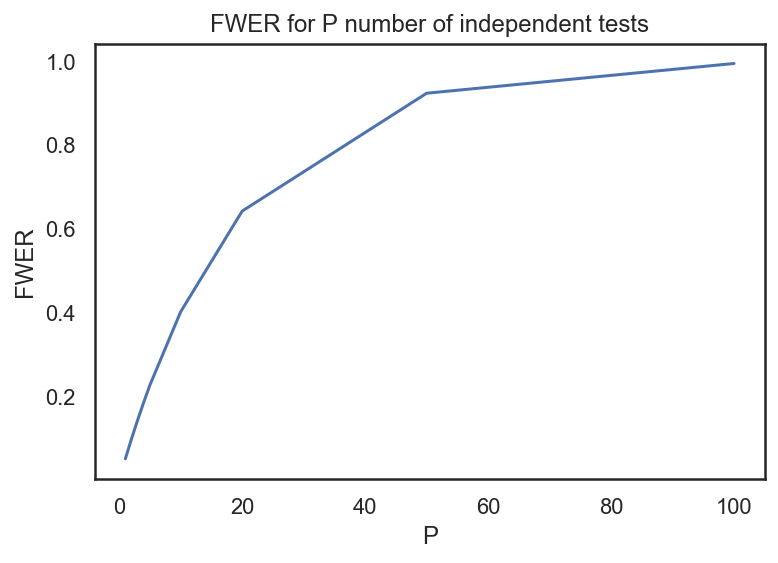

In [7]:
data = {'P': [1,2,3,4,5,10,20,50,100],
        'FWER':[0.05, 0.0975, 0.1426, 
                0.1854, 0.2262, 0.4012, 
                0.6415, 0.9230, 0.9940]}
dfmultiple = pd.DataFrame(data)
ax = sns.lineplot(x="P", y="FWER", 
                  markers=True, data=dfmultiple)
plt.title('FWER for P number of independent tests');

Clearly, we don't want family wise error, when we do multiple testing. And there are two main ways to combat it. `Bonferroni correction` and `Holm's method`. In Bonferroni, equivalent adjustments are made to each p-value. In Bonferroni, the significance of each test is set at `α/m`

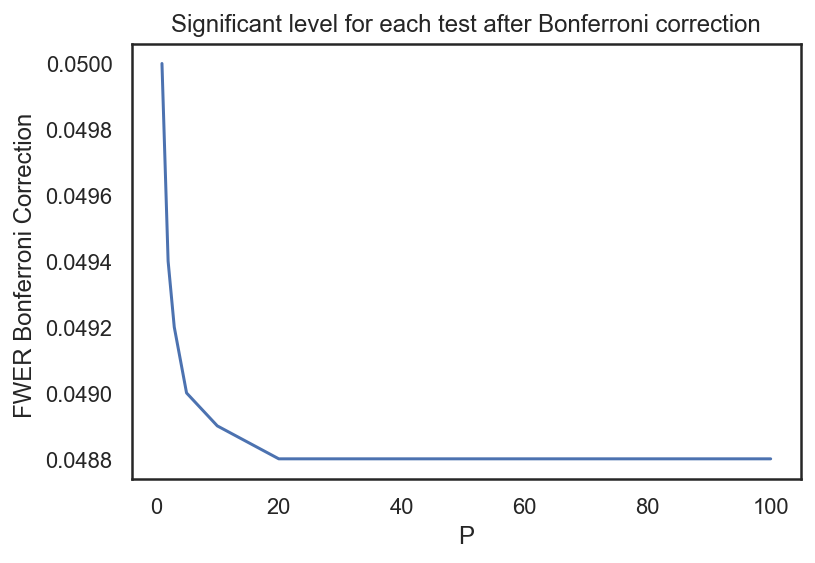

In [8]:
data = {'P': [1,2,3,4,5,10,20,50,100],
       'FWER Bonferroni Correction ': [0.0500, 0.0494, 0.0492, 
                                       0.0491, 0.0490, 0.0489, 
                                       0.0488, 0.0488, 0.0488]}
dfmultiple = pd.DataFrame(data)
ax = sns.lineplot(x="P", y="FWER Bonferroni Correction ", 
                  markers=True, data=dfmultiple)
plt.title('Significant level for each test after Bonferroni correction');

In `Holms`, adaptive changes are made to each p-value. First, the p-values are ranked in ascending order. The significance level is then defined by the α divided by the rank of the p-value.

$$
α^* = \frac{α}{(m-j+1)}
$$

Where `m` is the number of null hypotheses and `j` is the rank of the p-value. 

Note that FWER correction as described above is not always desireable because while they guard against type 1 error, they are always at the risk of committing a type II error. And depending on the application at hand, FWER correction might be conducted or jettisoned. Take a drug the FDA is hoping to pass to the public. Before then clinical trials are conducted. The null hypopthesis will be 'there are side effects from using this drug' (the alternative hypothesis is the opposite). Now, the type 1 error would be to claim that the drug doesn't have a side effect, when it has. While the type II error would be to claim that the drug does have a side effect, when infact it does. Clearly, here, we can't tolerate any Type I error and therefore FWER correction is appropriate here. However, take a metabolomics study where we want to find the association between several thousand metabolic features and a disease condition, and we want to use multiple testing correction to sieve through this thousands of features. Here, the type I error will be to claim that there is an association, when infact there is no association; on the other hand, the type II error will be a claim that there are no association when there is. Clearly here we can cope with a level of type I error here. And we don't want to risk an type II error. To handle this scenario, we will talk False discovery rate, `FDR correction`.        
<br>
A method for FDR correction is called the `Benjamini-Hocberg` procedure. Where, first, the pvalues are ranked. Afterwards a new significance level is set as the following: 

$$
p_k \leq \frac{k}{m}α
$$

Where, <br>
`k` = rank of the p-value <br>
`m` = number of null hypothesis

## 8. Motivating Examples
<a id="8"></a>

### 8.1 Exploratory Data Analysis
<a id="8.1"></a>

In this section, I will make use of the famous data from 1974 Motor Trend US magazine. The data contains 32 automobiles with associated 11 variables such as miles per gallon (mpg), Number of cylinders (cyl), Displacement (disp) and others.

We will perform the following exercises. 
1. Sample mean and sample variance of each variable
2. Sample variance-covariance matrix and the correlation matrix
3. Pairwise scatterplot for all variables.

In [9]:
# Read the mtcars.csv file
df = pd.read_csv(filepath_or_buffer = 'mtcars.csv', sep=',')
print (df.shape)
df.head()

(32, 12)


model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

_1) Sample mean and sample variance of each variable._

In [10]:
# Sample mean of each variable
# sample mean of each variable
pd.DataFrame(df.drop(['model'], axis=1).mean(axis=0), columns =['Mean'])

Mean
mpg    20.090625
cyl     6.187500
disp  230.721875
hp    146.687500
drat    3.596563
wt      3.217250
qsec   17.848750
vs      0.437500
am      0.406250
gear    3.687500
carb    2.812500

In [11]:
# Sample variance of each variable
pd.DataFrame(df.var(axis=0), columns= ['Sample Variance'])

Sample Variance
mpg         36.324103
cyl          3.189516
disp     15360.799829
hp        4700.866935
drat         0.285881
wt           0.957379
qsec         3.193166
vs           0.254032
am           0.248992
gear         0.544355
carb         2.608871

_2) Calculate sample variance-covariance matrix and correlation matrix._

In [12]:
# The variance-covariance matrix
df.cov()

mpg         cyl          disp           hp       drat  \
mpg    36.324103   -9.172379   -633.097208  -320.732056   2.195064   
cyl    -9.172379    3.189516    199.660282   101.931452  -0.668367   
disp -633.097208  199.660282  15360.799829  6721.158669 -47.064019   
hp   -320.732056  101.931452   6721.158669  4700.866935 -16.451109   
drat    2.195064   -0.668367    -47.064019   -16.451109   0.285881   
wt     -5.116685    1.367371    107.684204    44.192661  -0.372721   
qsec    4.509149   -1.886855    -96.051681   -86.770081   0.087141   
vs      2.017137   -0.729839    -44.377621   -24.987903   0.118649   
am      1.803931   -0.465726    -36.564012    -8.320565   0.190151   
gear    2.135685   -0.649194    -50.802621    -6.358871   0.275988   
carb   -5.363105    1.520161     79.068750    83.036290  -0.078407   

              wt       qsec         vs         am       gear       carb  
mpg    -5.116685   4.509149   2.017137   1.803931   2.135685  -5.363105  
cyl     1.367371  -1.886855  -0.729839  -0.465726  -0.649194   1.520161  
disp  107.684204 -96.051681 -44.377621 -36.564012 -50.802621  79.068750  
hp     44.192661 -86.770081 -24.987903  -8.320565  -6.358871  83.036290  
drat   -0.372721   0.087141   0.118649   0.190151   0.275988  -0.078407  
wt      0.957379  -0.305482  -0.273661  -0.338105  -0.421081   0.675790  
qsec   -0.305482   3.193166   0.670565  -0.204960  -0.280403  -1.894113  
vs     -0.273661   0.670565   0.254032   0.042339   0.076613  -0.463710  
am     -0.338105  -0.204960   0.042339   0.248992   0.292339   0.046371  
gear   -0.421081  -0.280403   0.076613   0.292339   0.544355   0.326613  
carb    0.675790  -1.894113  -0.463710   0.046371   0.326613   2.608871

In [13]:
# The correlation matrix
df_corr = df.drop(['model'], axis=1).corr()
df_corr

mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  0.599832  0.480285 -0.550925  
cyl  -0.810812 -0.522607 -0.492687  0.526988  
disp -0.710416 -0.591227 -0.555569  0.394977  
hp   -0.723097 -0.243204 -0.125704  0.749812  
drat  0.440278  0.712711  0.699610 -0.090790  
wt   -0.554916 -0.692495 -0.583287  0.427606  
qsec  0.744535 -0.229861 -0.212682 -0.656249  
vs    1.000000  0.168345  0.206023 -0.569607  
am    0.168345  1.000000  0.794059  0.057534  
gear  0.206023  0.794059  1.000000  0.274073  
carb -0.569607  0.057534  0.274073  1.000000

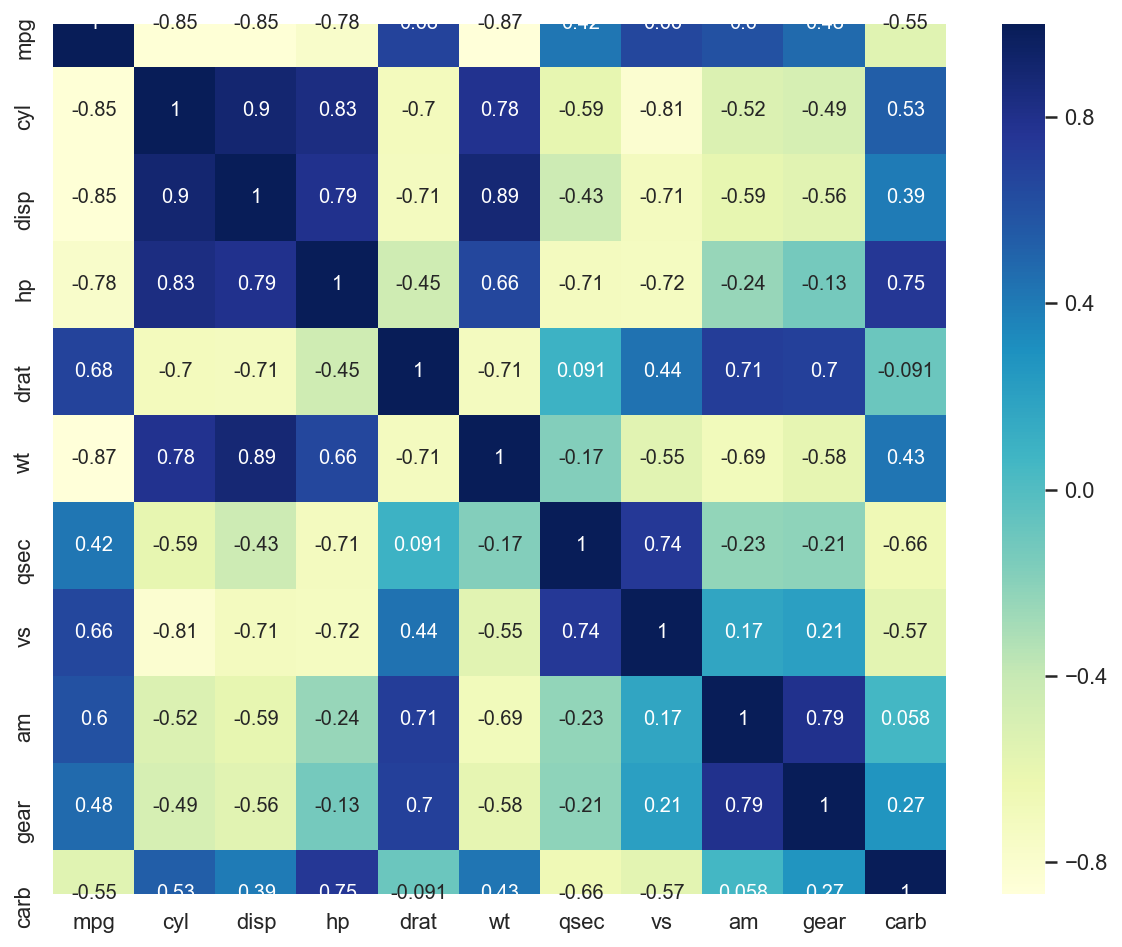

In [14]:
# The correlation presented in the form of a heatmap for visualization ease
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, xticklabels=df.drop(['model'], axis=1).columns, 
            yticklabels=df.drop(['model'], axis=1).columns, 
            annot=True, cmap="YlGnBu");

_3. Draw pairwise scatter plot for all variables._ 

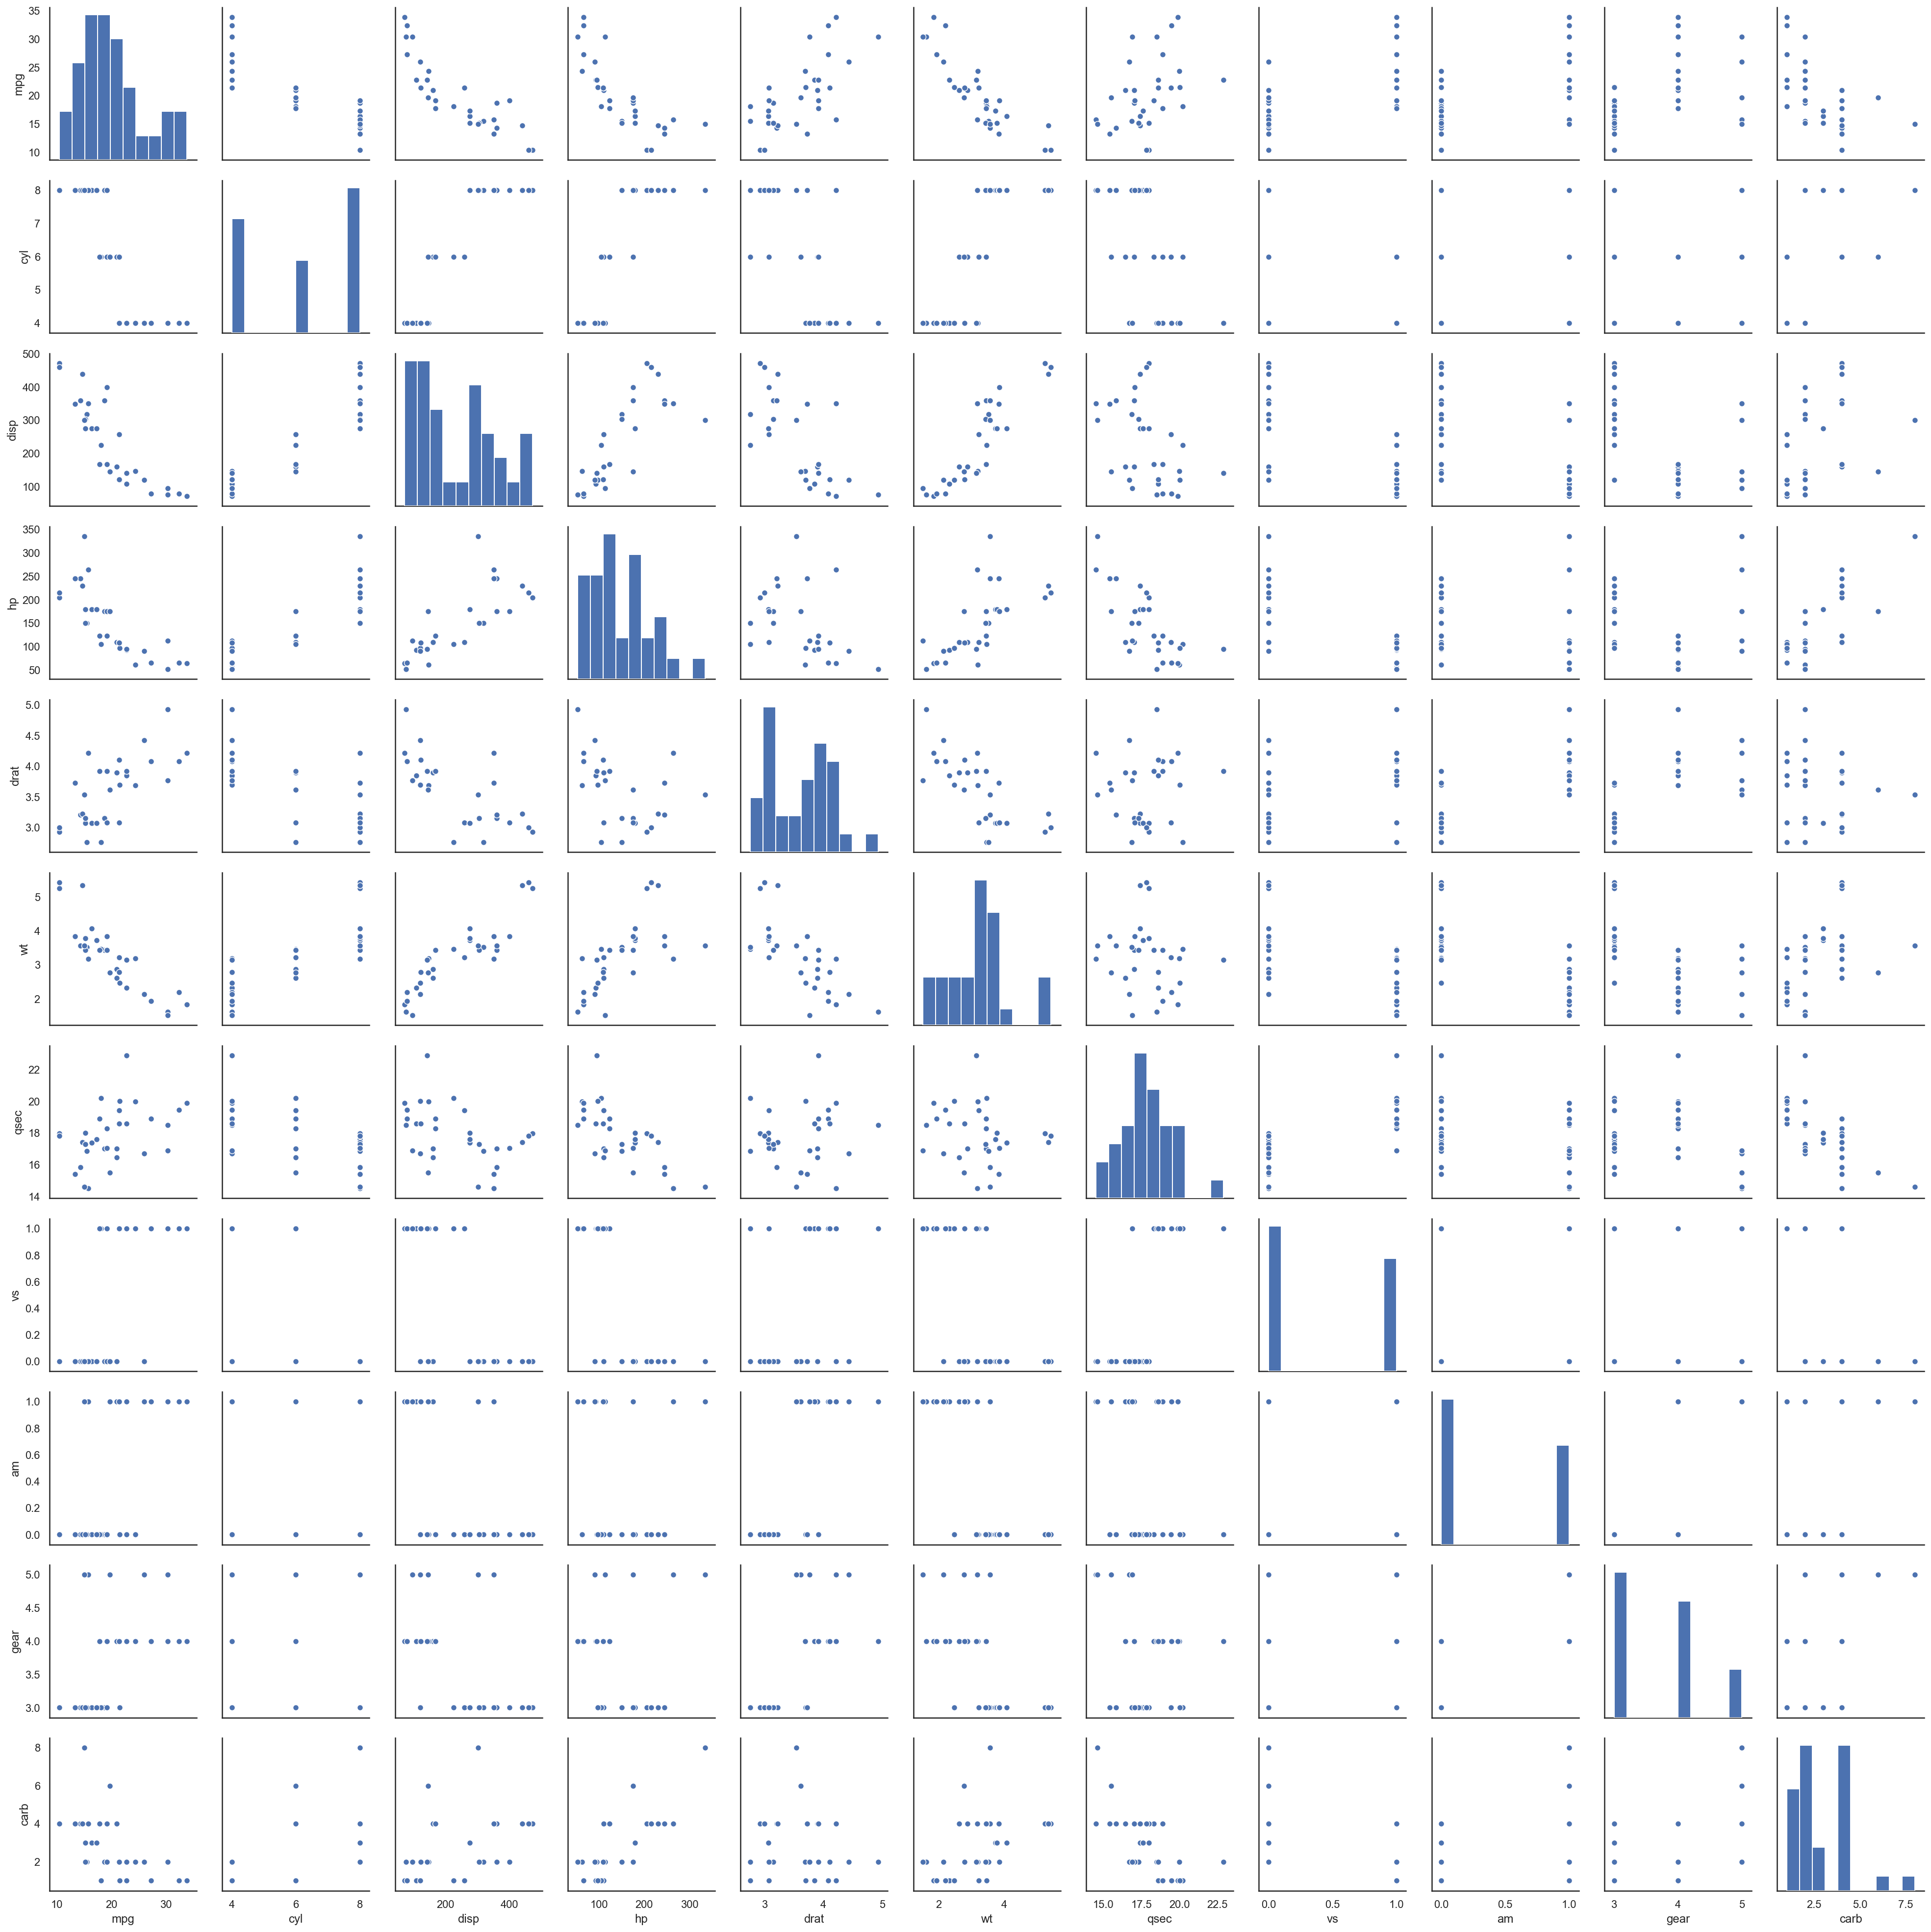

In [15]:
sns.pairplot(df.drop(['model'], axis=1));

### 8.2 Mean Inference Problem
<a id="8.2"></a>

Here we will use a USDA Women's Health Survey dataset. It contains 5 nutrient intakes measured from 737 women in United States.  

We will perform the following exercises. 

1. Calculate the sample and standard deviation of each variable
2. For each nutrient let's test if the population mean of each variables equal the recommended value

In [16]:
# Read the 'nutrient' dataset
df = pd.read_csv(filepath_or_buffer = 'nutrient.csv', sep=',')
print(df.shape)
df.head()

(737, 6)


Number  Calcium    Iron  Protein  Vitamin A  Vitamin C
0       1   522.29  10.188   42.561     349.13     54.141
1       2   343.32   4.113   67.793     266.99     24.839
2       3   858.26  13.741   59.933     667.90    155.455
3       4   575.98  13.245   42.215     792.23    224.688
4       5  1927.50  18.919  111.316     740.27     80.961

_1). Calculate sample mean and sample standard deviation of each variable._

In [17]:
nutrients = ['Calcium', 'Iron', 'Protein', 'Vitamin A', 'Vitamin C']
mean, std = [], []
for nutrient in nutrients: 
    x=df[nutrient].get_values().mean()
    y=df[nutrient].get_values().std()
    mean.append(x)
    std.append(y)
dfTable = pd.DataFrame({'Nutrients': nutrients, 'Mean': mean, 'Standard Deviation': std })
dfTable

Nutrients        Mean  Standard Deviation
0    Calcium  624.049254          397.007925
1       Iron   11.129900            5.980129
2    Protein   65.803441           30.555006
3  Vitamin A  839.635346         1632.431216
4  Vitamin C   78.928446           73.545326

Let's say the recommended intake amount of each nutrient is given in the following table.

In [18]:
pd.DataFrame({'Calcium': 1000, 'Iron': 15, 'Protein': 60, 'Vitamin A': 800, 'Vitamin C': 75 }, 
                       index=['Recommended Intake'])

Calcium  Iron  Protein  Vitamin A  Vitamin C
Recommended Intake     1000    15       60        800         75

_2) Now, for each nutrient let's test if the population mean of each variables equal the recommended value_

Recall that here we will use a one-sample _t_-test, and let's set our alpha to .05

In [19]:
cal_mean = dfTable.iloc[:, 1].values.tolist() 
#retrieve the mean of the of each nutrients from dfTable to a list of means. 
rec_value = [1000, 15, 60, 800, 75] # recommended intake amount
dfnutrients = [df['Calcium'], df['Iron'], 
               df['Protein'], df['Vitamin A'], df['Vitamin C']]

In [20]:
plist, resultlist, commentlist = [], [], []
for dfnut, rv in zip(dfnutrients, rec_value): 
    tstatistic, pvalue = scipy.stats.ttest_1samp(dfnut, rv)
    plist.append(pvalue)
    if pvalue < 0.05: 
        result = 'reject null hypothesis'
    else: 
        result = 'do not reject null hypothesis'
    resultlist.append(result)
    if result == 'reject null hypothesis': 
        comment = 'population mean does not equal recommended value'
    else:
        comment = 'population mean equals recommended value'
    commentlist.append(comment) 

In [21]:
dfp = pd.DataFrame({'Nutrients': nutrients, 'Population Mean': cal_mean, 
                    'Recommended Mean': rec_value, '1-Sample T-test p-value': plist,
                    'Result': resultlist, 'Comment': commentlist})
dfp

Nutrients  Population Mean  Recommended Mean  1-Sample T-test p-value  \
0    Calcium       624.049254              1000            2.108727e-104   
1       Iron        11.129900                15             6.654391e-58   
2    Protein        65.803441                60             3.299706e-07   
3  Vitamin A       839.635346               800             5.102954e-01   
4  Vitamin C        78.928446                75             1.477297e-01   

                          Result  \
0         reject null hypothesis   
1         reject null hypothesis   
2         reject null hypothesis   
3  do not reject null hypothesis   
4  do not reject null hypothesis   

                                            Comment  
0  population mean does not equal recommended value  
1  population mean does not equal recommended value  
2  population mean does not equal recommended value  
3          population mean equals recommended value  
4          population mean equals recommended value

## Resources and References
1. Dr Nik's Maths and Stats, [Understanding p-value - Statistics Help](https://www.youtube.com/watch?v=eyknGvncKLw). YouTube. Retrieved on 29 November 2019
2. Edouard Duchesnay, _et al_ 13 November 2019, [Statistics and Machine Learning in Python Release 0.3 beta](ftp://ftp.cea.fr/pub/unati/people/educhesnay/pystatml/StatisticsMachineLearningPythonDraft.pdf) Chapter 4, Statistics. 
3. Xianjun Dong, 05 December, 2015, [My Notes on Multiple Testing](https://www.r-bloggers.com/my-note-on-multiple-testing/), R-blogger.com, Retrieved on 29 November 2019
4. PennState, STAT 505, [Applied Multivariate Statistical Analysis Online Class](https://newonlinecourses.science.psu.edu/stat505/) Lessons 1, 5 & 7. Retrieved on 29 November 2019